# **Deep Learning** _Day 123_
##### Name: Muhammad Hassaan
##### Date: August 29, 2024
##### Email: muhammadhassaan7896@gmail.com

# **Time Series Data Analysis Project**

# Time Series Data Analysis: Air Passengers (1949-1960)

This notebook explores the time series data of monthly airline passengers from 1949 to 1960. The dataset contains the total number of passengers (in thousands) for each month, providing a rich dataset for analyzing trends, seasonality, and forecasting future values.

## Objectives
- **Data Exploration:** Understanding the structure and characteristics of the data.
- **Trend Analysis:** Identifying long-term trends in passenger numbers.
- **Seasonality:** Detecting seasonal patterns within the data.
- **Time Series Decomposition:** Breaking down the data into trend, seasonal, and residual components.
- **Forecasting:** Building predictive models to forecast future passenger numbers.

This analysis will be performed using Python's data science libraries such as Pandas, Matplotlib, and Statsmodels, providing a comprehensive overview of time series analysis techniques.


In [30]:
# import libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from statsmodels.tsa.seasonal import seasonal_decompose

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [15]:
# load the data
df = pd.read_csv("./data/AirPassengers.csv")

# show the head
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [16]:
df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


## **Data Pre-Processing**

In [17]:
print(df.columns)

Index(['Month', '#Passengers'], dtype='object')


In [19]:
# change the names of the columns
df.columns = ["Date","Number of Passengers"]
df.head()

,Date,Number of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


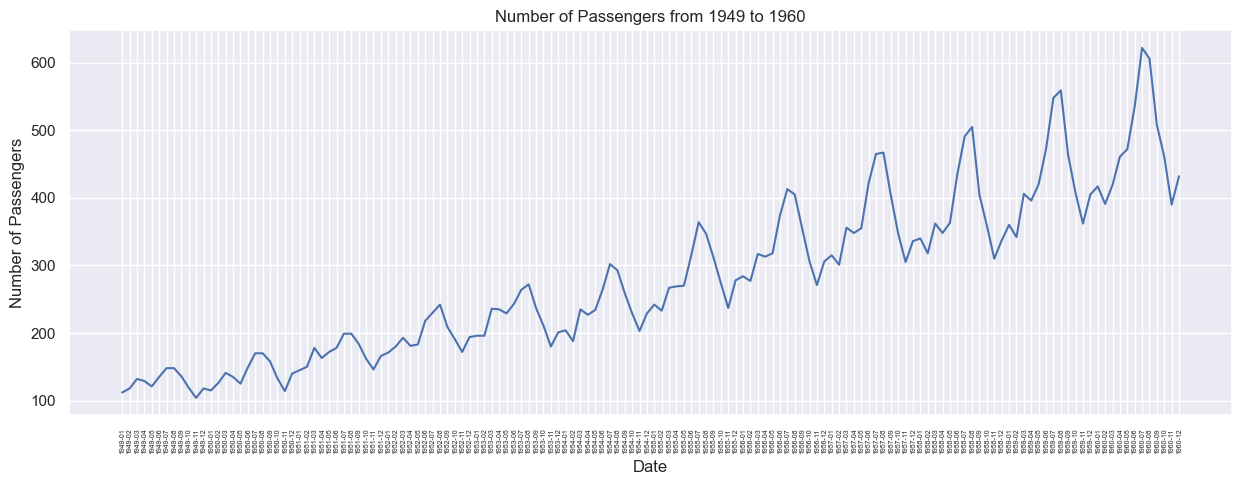

In [28]:
# plot the data
sns.set(rc={'figure.figsize':(15,5)})
sns.lineplot(x="Date", y="Number of Passengers", data=df)
# define x and y labels
plt.xlabel("Date")
plt.ylabel("Number of Passengers")
# define title
plt.title("Number of Passengers from 1949 to 1960")
# rotate x-axis ticks
plt.xticks(rotation=90, fontsize=5)
plt.show()

In [50]:
# same plot using plotly
fig = px.line(df, 
              x="Date", 
              y="Number of Passengers", 
              title="Number of Passengers over Time")

# update traces
fig.update_traces(mode='markers+lines', 
                  hovertemplate=None,
                  marker_size=5,
                  line_color='red', 
                  marker_color='blue')

# show the fig
fig.show()

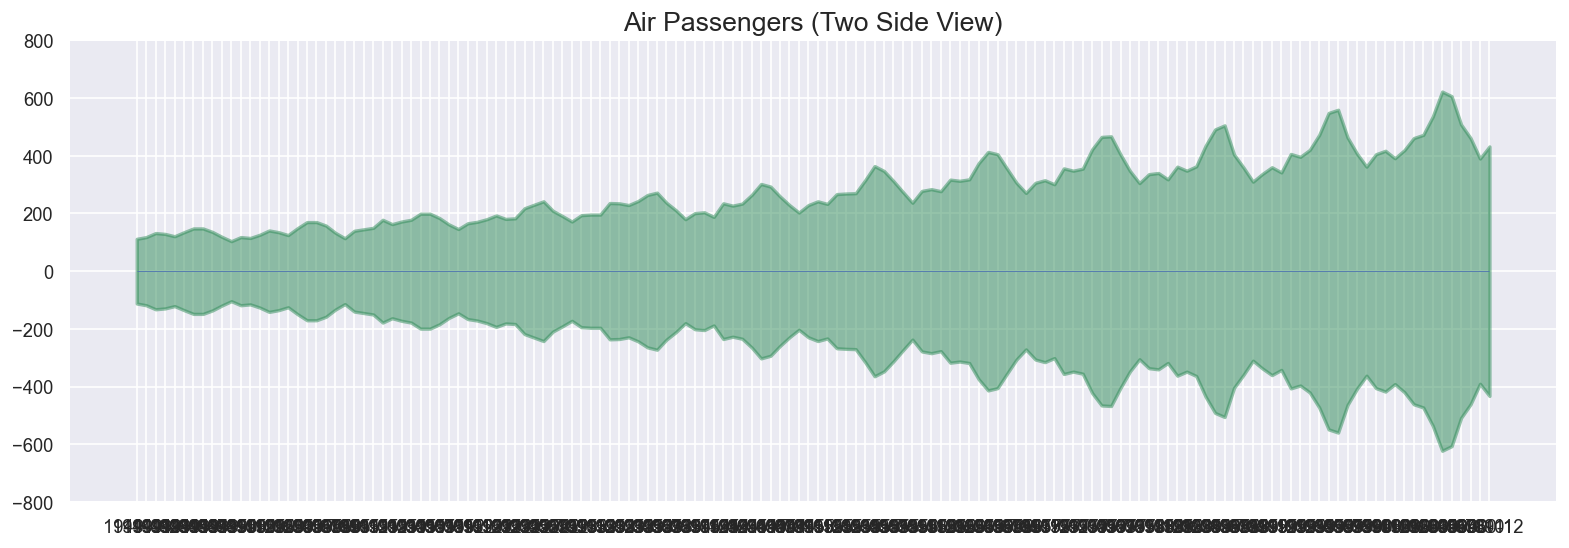

In [54]:
x = df['Date'].values
y1 = df['Number of Passengers'].values

# Plot
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-800, 800)
plt.title('Air Passengers (Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(df['Date']), xmax=np.max(df['Date']), linewidth=.5)
plt.show()

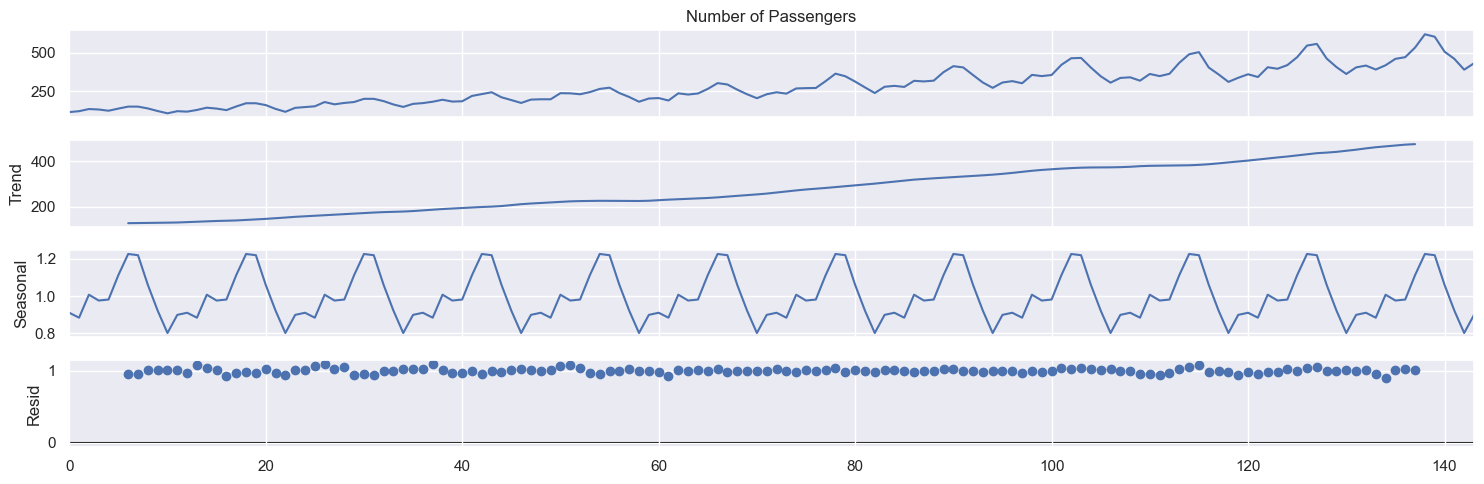

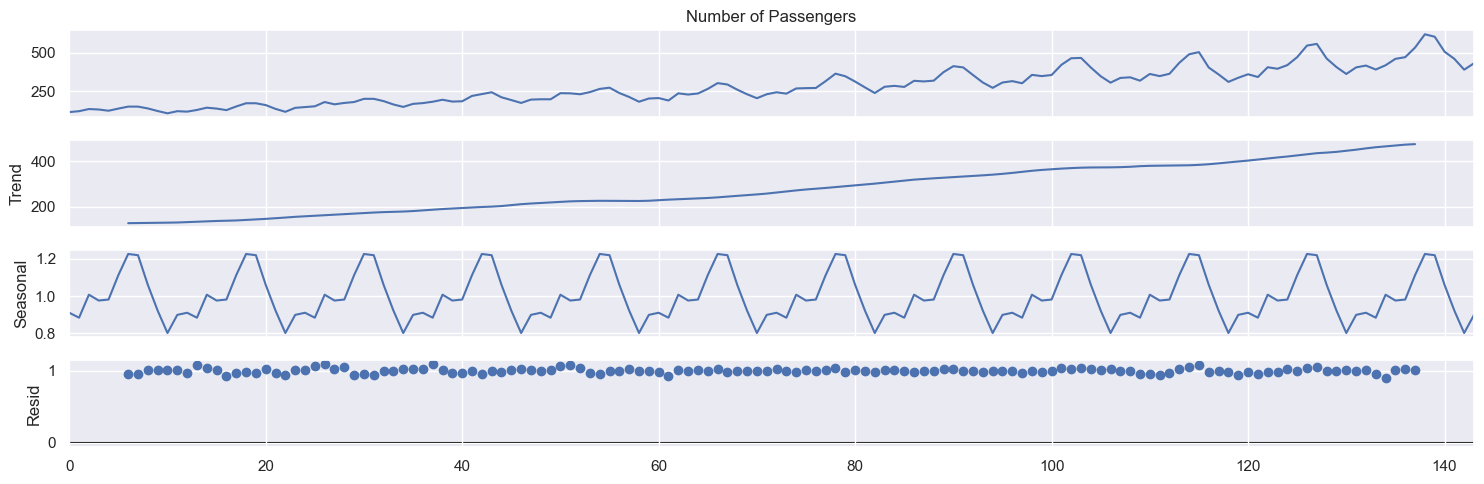

In [58]:
# decompose the data
result = seasonal_decompose(df['Number of Passengers'], model='multiplicative', period=12)
result.plot()

In [59]:
# plot in plotly
fig = px.line(result.observed, x=result.observed.index, y=result.observed.values, title='Observed')
fig.show()

<Axes: >

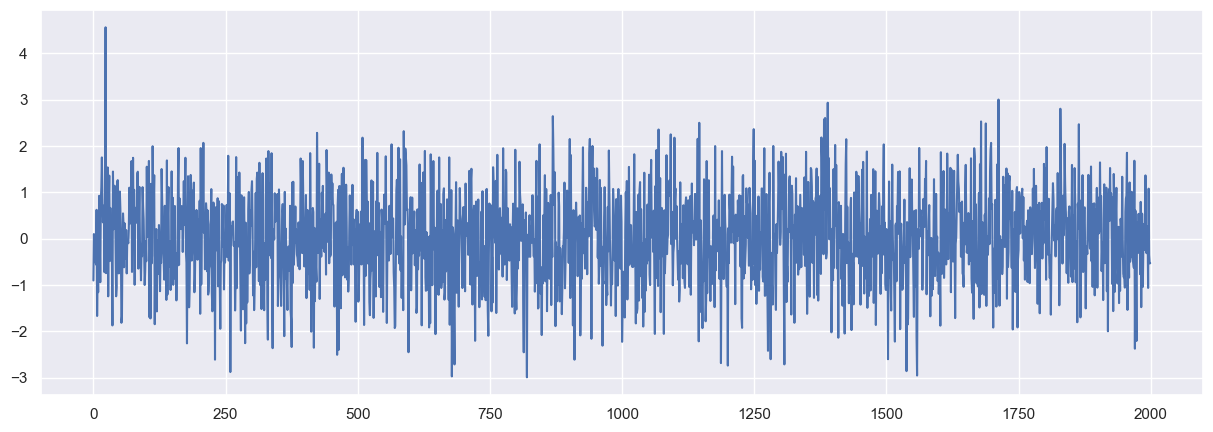

In [60]:
rand_numbs = np.random.randn(2000)
rand_numbs
pd.Series(rand_numbs).plot()

---